# 6 卷积神经网络

卷积神经网络（convolutional neural network，CNN）是一类强大的、为处理图像数据而设计的神经网络。基于卷积神经网络架构的模型在计算机视觉领域中已经占主导地位。

## 6.1 卷积神经网络

多层感知机适合处理表格数据（样本 × 特征），而图像数据集属于高维感知数据。

如果将图像数据展平成一维向量，再将数据送入一个全连接的多层感知机中，会忽略了每个图像的空间结构信息。除此以外，图像的像素输入极大，每次输入都是百万数量级的，想要训练这样的模型将不可实现。

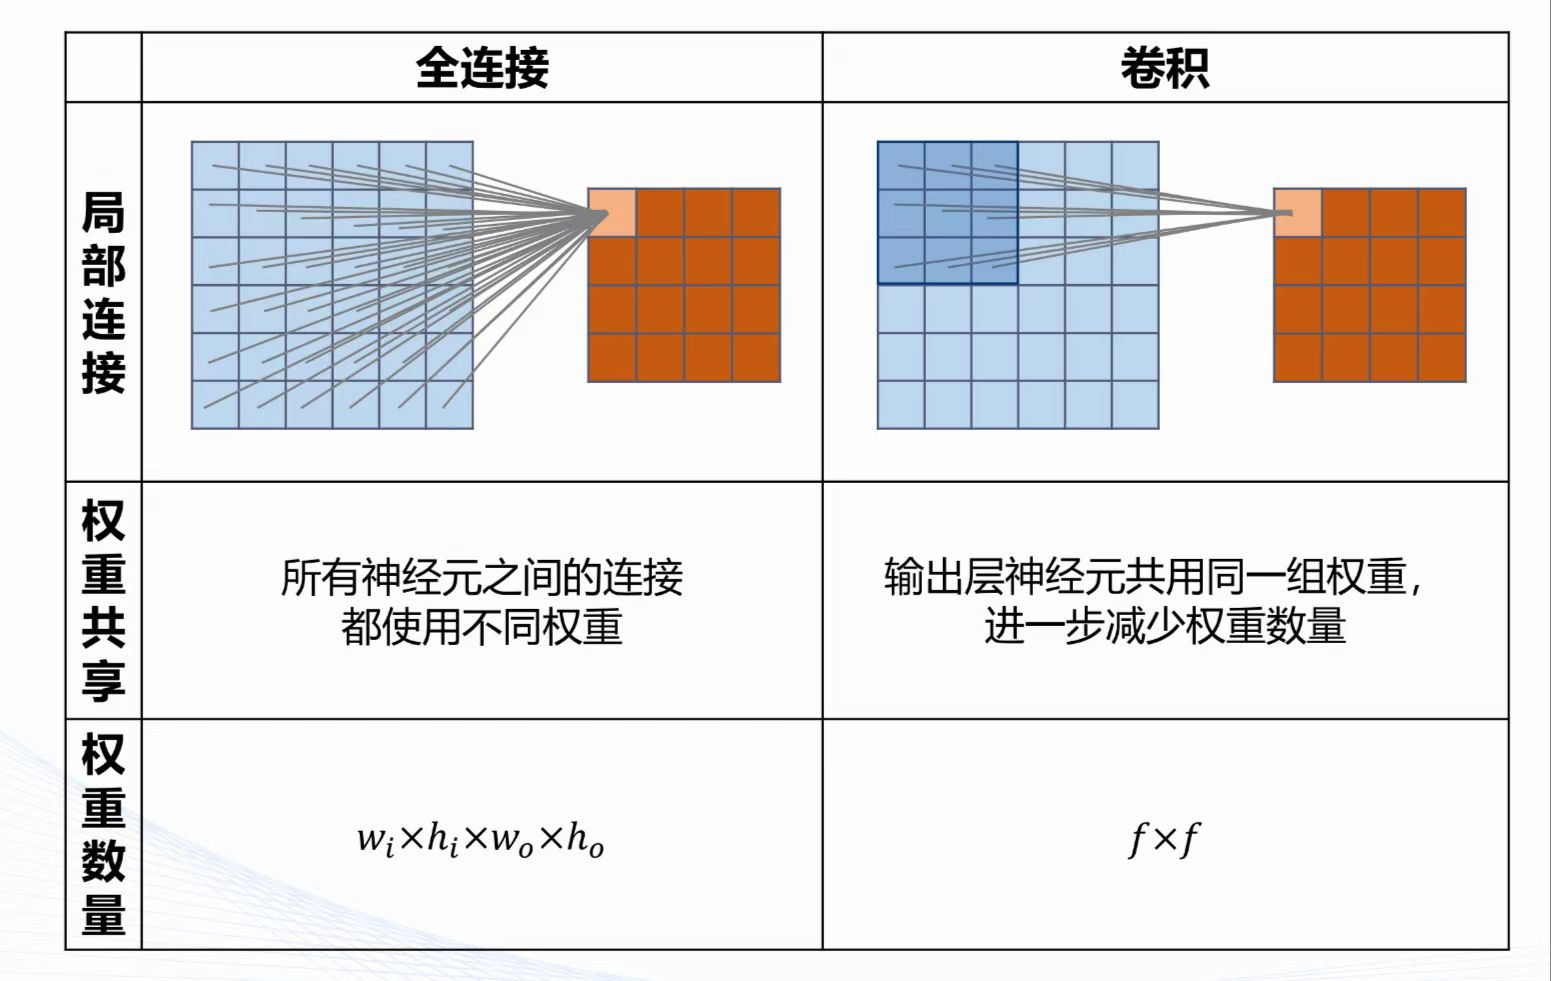

因此需要转变思路：图像中本就拥有丰富的结构， **卷积神经网络（convolutional neural networks, CNN）** 是机器学习利用自然图像中一些已知结构的创造性方法。

#### 导入卷积

多层感知机的输入是二维图像 $\textbf{X}$ ，隐藏表示 $\textbf{H}$ 。二者具有相同形状。 $\textbf{H}$ 中每个元素与 $\textbf{X}$ 中所有元素有关，相关性通过对应的权重和偏置决定。权重矩阵 $\textbf{W}$ 具有四维，分别对应 $\textbf{X}$ 和 $\textbf{H}$ 的二维：

$$
[\textbf{H}]_{i,j} = [\textbf{U}]_{i,j} + \sum_k \sum_l [\textbf{W}]_{i,j,k,l} [\textbf{X}]_{k,l}
$$

$\textbf{W}$ 的后两个索引对应于输入 $\textbf{X}$ 。不妨引入正负偏移索引 $a$ , $b$ ，使得：

$$
[\textbf{H}]_{i,j} = [\textbf{U}]_{i,j} + \sum_a \sum_b [\textbf{V}]_{i,j,a,b} [\textbf{X}]_{i+a, j+b}
$$


**平移不变性（translation invariance）** ：

不管检测对象出现在图像中的哪个位置，神经网络的前面几层应该对相同的图像区域具有相似的反应，即为“平移不变性”。

换句话说，两个一样的形状在图像的不同位置，它们对隐藏关系的贡献应该是一样的。那么对于固定索引 $a,b$ ：

$$
[\textbf{U}]_{i_1,j_1} + \sum_a \sum_b [\textbf{V}]_{i_1,j_1,a,b} [\textbf{X}]_{i_1+a, j_1+b} 
=
[\textbf{U}]_{i_2,j_2} + \sum_a \sum_b [\textbf{V}]_{i_2,j_2,a,b} [\textbf{X}]_{i_2+a, j_2+b}
$$

当 $[\textbf{X}]_{i_1+a, j_1+b} = [\textbf{X}]_{i_2+a, j_2+b}$ 时：

$$
[\textbf{U}]_{i_1,j_1} = [\textbf{U}]_{i_2,j_2}
$$

$$
[\textbf{V}]_{i_1,j_1,a,b} = [\textbf{V}]_{i_2,j_2,a,b}
$$

所以 $\textbf{V}$ 和 $\textbf{U}$ 实际上不依赖于 $(i,j)$ 的值：

$$
[\textbf{H}]_{i,j} = u + \sum_a \sum_b [\textbf{V}]_{a,b} [\textbf{X}]_{i+a,j+b}
$$

这就是 **卷积（convolutioon）** 。我们是在使用系数 $[\textbf{V}]_{a,b}$ 对位置 $(i,j)$ 附近的像素 $(i + a, j + b)$ 进行加权得到 $[\textbf{H}]_{i,j}$ 。



**局部性（locality）** ：

神经网络的前面几层应该只探索输入图像中的局部区域，而不过度在意图像中相隔较远区域的关系。

因此上式中的 $a,b$ 是有设置的界限的。

#### 卷积层

$$
[\textbf{H}]_{i,j} = u + \sum_a \sum_b [\textbf{V}]_{a,b} [\textbf{X}]_{i+a,j+b}
$$

这个式子便是一个 **卷积层（convolutional layer）** ，卷积神经网络是包含卷积层的一类特殊的神经网
络。在深度学习中， $\textbf{V}$ 被称为 **卷积核（convolution kernel）** 或 **滤波器（filter）** 。

多层感知机可能需要数十亿个参数来表示网络中的一层，而现在卷积神经网络通常只需要几百个参数，而且不需要改变输入或隐藏表示的维数。

#### 通道

在图像存储中，图像并不是二维张量，例如RGB图像包含三通道，此时新增了通道维度。由于输入图像是三维的，隐藏表示也最好是三维的。因此需要表示：

$$
[\textbf{H}]_{i,j,d} = \sum_{a=-\Delta}^{\Delta} \sum_{b=-\Delta}^{\Delta} \sum_c [\textbf{V}]_{a,b,c,d} [\textbf{X}]_{i+a, j+b, c}
$$

#### 卷积和运算/互相关运算

使用 **核函数** （即 $\textbf{V}$）作为卷积窗口，从输入张量的左上角开始，从左到右、从上到下滑动，进行乘累加操作，得出这一位置的输出张量值。

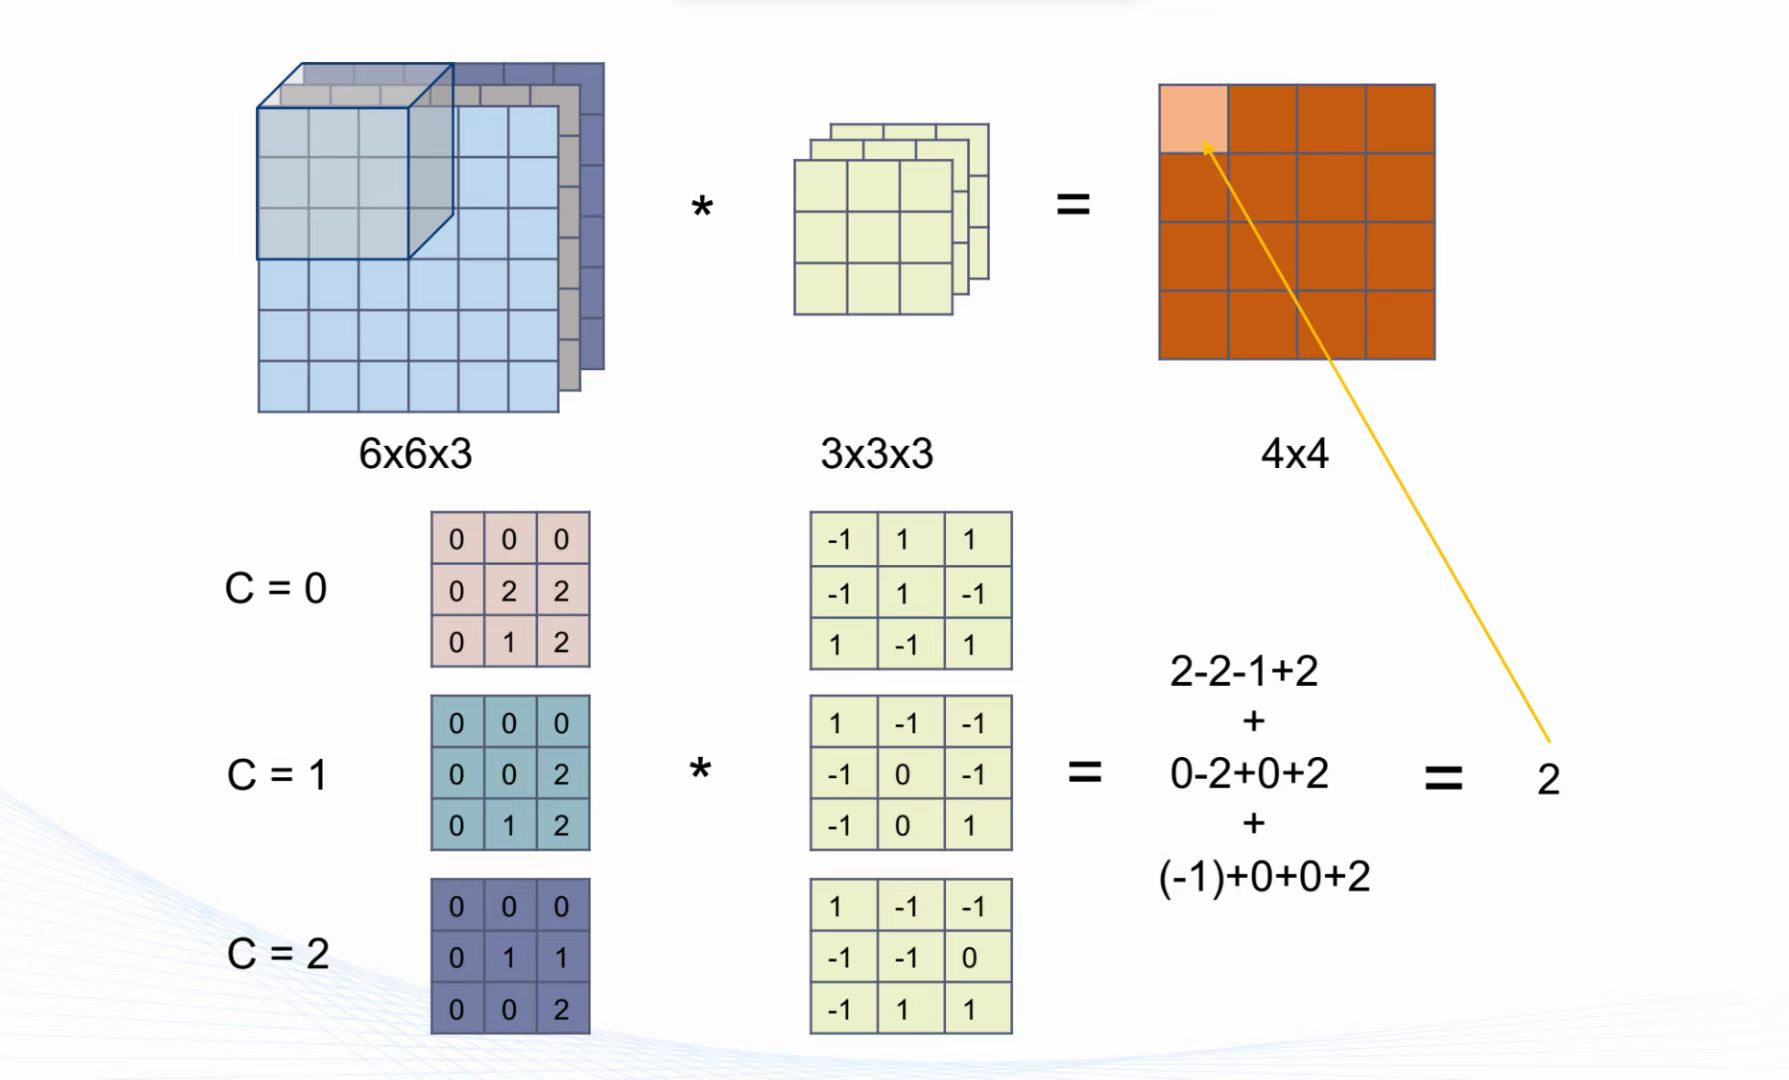

卷积层对输入和卷积核权重进行互相关运算，并在添加标量偏置之后产生输出。所以，卷积层中的两个被训练的参数是卷积核权重和标量偏置。

卷积和运算即是水平和垂直翻转二维卷积核张量后对输入张量执行互相关运算。

为了构建多个输出通道，需要设置与输出通道相同数量的卷积核函数，然后让输入张量与每个核函数作互相关运算。

自定义卷积层：

In [ ]:
import torch
from torch import nn

def corr2d(X, K): #@save
    """计算二维互相关运算"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
        
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias
    

Pytorch 中内置的卷积层创建函数为 `nn.Conv2d()` ：

```python
# 创建2D卷积层
conv_layer = nn.Conv2d(
    in_channels,    # 输入通道数
    out_channels,   # 输出通道数（卷积核数量）
    kernel_size,    # 卷积核尺寸
    stride=1,       # 步长（默认1）
    padding=0,      # 填充（默认0）
    dilation=1,     # 空洞卷积（默认1）
    groups=1,       # 分组卷积（默认1）
    bias=True       # 是否包含偏置项（默认True）
)
```

例如下面的代码构造了一个二维卷积层，它具有1个输出通道和形状为(1, 2)的卷积核。

```python
conv2d = nn.Conv2d(1,1, kernel_size=(1, 2), bias=False)
```

## 6.2 填充和步幅

在 `nn.Conv2d()` 的讲解中，介绍到两个参数 **填充（padding）** 和 **步幅（stride）**。



**填充（padding）** ：

在应用多层卷积时，常常丢失边缘像素。填充即为解决此问题的方法：在输入图像的边界填充元素，通常填充元素是0。

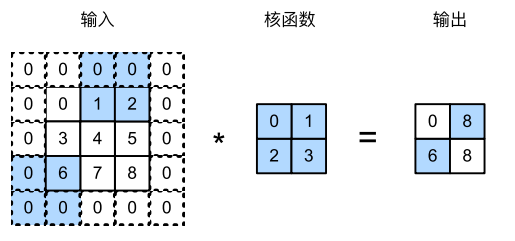

一般情况下，填充的大小和核函数的大小相关。填充的行数为核函数行数减1，填充的列数为核函数列数减1，大约分为两半在不同侧。


**步幅（stride）** ：

在计算互相关时，卷积窗口从输入张量的左上角开始，向下、向右滑动。一般默认每次滑动一个元素，有时候为了高效计算或是缩减采样次数，卷积窗口可以跳过中间位置，每次滑动多个元素。每次滑动元素的数量称为步幅。

加入非1步幅的卷积和结果的形状为原形状整除步幅。

在实践中，我们很少使用不一致的步幅或填充，也就是说，高度和宽度的步幅或填充通常相同。



## 6.3 汇聚层/池化层

**感受野（receptive field）** ：

在卷积神经网络中，对某一层的任意元素 $x$ ，其感受野是指在前向传播期间可能影响 $x$ 计算的所有元素（来自所有先前层）。

#### 汇聚层

通常当我们处理图像时，我们希望逐渐降低隐藏表示的空间分辨率、聚集信息，这样随着我们在神经网络中层叠的上升，每个神经元对其敏感的感受野（输入）就越大。

机器学习任务通常会跟全局图像的问题有关，所以我们最后一层的神经元应该对整个输入的全局敏感。此外，当检测较底层的特征时，我们通常希望这些特征保持某种程度上的平移不变性。

**汇聚层（pooling，池化层）** 具有双重目的：降低卷积层对位置的敏感性，同时降低对空间降采样表示的敏感性。

汇聚层运算符和卷积核类似，也是一个固定形状的窗口，根据其步幅大小在输入的所有区域上滑动。

汇聚层不包含参数，池运算是确定性的。汇聚窗口形状为 $p \times q$ 的汇聚层称为 $p \times q$ 汇聚层，汇聚操作称为 $p \times q$ 汇聚。

- **最大汇聚层（maximum pooling）** ：计算汇聚窗口中所有元素的最大值。
- **平均汇聚层（average pooling）** ：计算汇聚窗口中所有元素的平均值。

在下面的代码中的pool2d函数，我们实现汇聚层的前向传播：

In [2]:
import torch
from torch import nn

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

在 Pytorch 中提供了多种池化层实现：

- `nn.MaxPool2d()` ：

    最常用的池化层，针对二维输入的最大池化层，提取局部区域的最大值：

    ```python
    import torch.nn as nn

    # 基本用法
    max_pool = nn.MaxPool2d(
        kernel_size,    # 池化窗口尺寸
        stride=None,    # 步长（默认等于kernel_size）
        padding=0,      # 填充
        dilation=1,     # 扩张率
        return_indices=False,  # 是否返回最大值位置
        ceil_mode=False  # 尺寸计算模式（True=向上取整，False=向下取整）
    )
    ```

- `nn.AvgPool2d()` ：

    针对二维输入的平均池化层，计算局部区域的平均值：

    ```python
    avg_pool = nn.AvgPool2d(
        kernel_size,
        stride=None,
        padding=0,
        ceil_mode=False,
        count_include_pad=True,  # 计算平均值时是否包含填充值
        divisor_override=None    # 可覆盖默认除数
    )
    ```

此外，还有针对1维和3维数据的池化层，如 `nn.MaxPool1d()` 和 `nn.MaxPool3d()`。

在处理多通道输入数据时，汇聚层在每个输入通道上单独运算，而不是像卷积层一样在通道上对输入进行汇
总。这意味着汇聚层的输出通道数与输入通道数相同。如：

In [3]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [4]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## 6.4 卷积神经网络（LeNet）

LeNet是最早发布的卷积神经网络之一，因其在计算机视觉任务中的高效性能而受到广泛关注。总体来看，LeNet（LeNet-5）由两个部分组成：

- 卷积编码器：由两个卷积块组成
    - 卷积块：每个卷积块中的基本单元是一个卷积层、一个sigmond激活函数和平均汇聚层
- 全连接层密集块：由三个全连接层组成

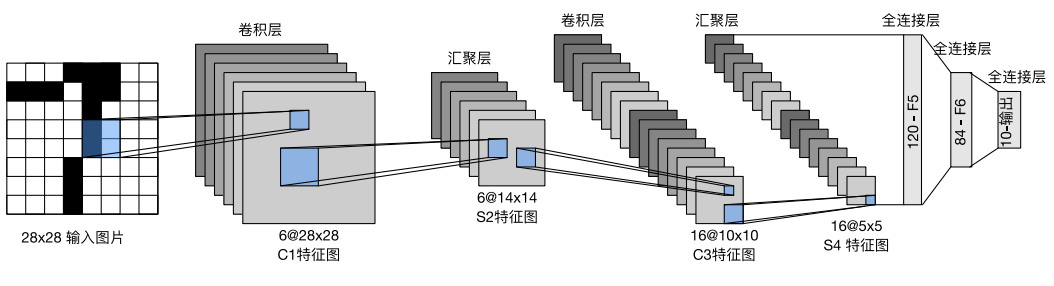

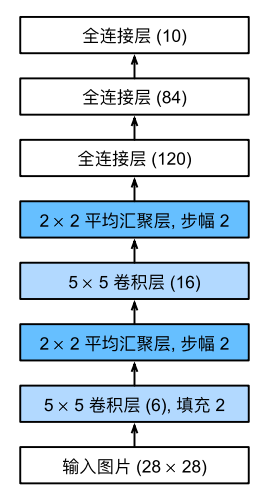
